# Projeto 2 - Previsão de Empréstimos - Irão pagar ou não
<img src="https://worldfinancialreview.com/wp-content/uploads/2020/02/Personal_loan_concept_with_contract_and_money_wutwhanfoto_Getty_Images_large.jpg" width="400" height="100"/>

A empresa deseja automatizar o processo de elegibilidade do empréstimo (em tempo real) com base nos detalhes do cliente fornecidos durante o preenchimento do formulário de inscrição online.

Esses detalhes são gênero, estado civil, educação, número de dependentes, renda, valor do empréstimo, histórico de crédito e outros.

Dadas as informações, temos que prever se eles pagarão o empréstimo ou não.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from plotnine import *

In [25]:
df=pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [26]:
df['Loan_Status'].drop_duplicates()

0    Y
1    N
Name: Loan_Status, dtype: object

In [27]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [28]:
df['Loan_Status'] = np.where(df['Loan_Status'] == 'Y', 1,0)

# Ver se tem valores fora do padrão

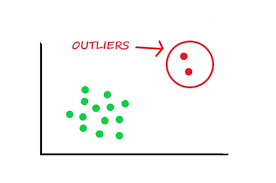

/usr/local/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 22 rows containing non-finite values.


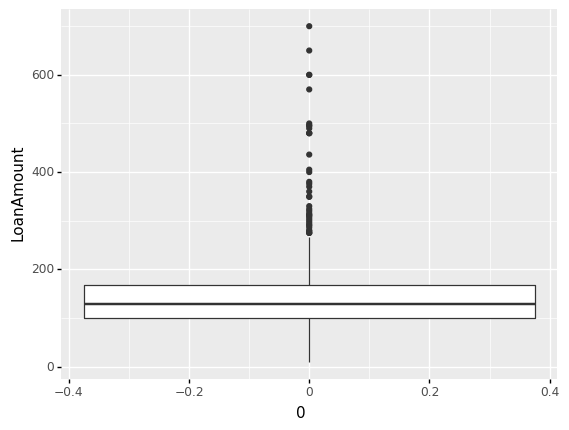

<ggplot: (329465390)>

In [44]:
(
    ggplot(df) +
    geom_boxplot(aes(x = 0 , y='LoanAmount'))
)

# Separar em Treino e Teste

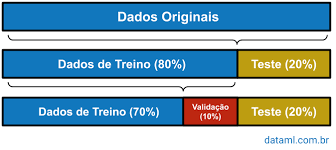

In [21]:
train , test = train_test_split(df,test_size=0.2,random_state=0)

In [22]:
train = train.drop(['Loan_ID'],axis=1)
test = test.drop(['Loan_ID'],axis=1)

# Retirar colunas que não usaremos no modelo

<img src="https://cdn2.iconfinder.com/data/icons/flat-pro-word-processing-set-5/32/table-column-delete-512.png" width="200" height="100"/>

In [23]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

# Valor Vazio

<img src="https://www.logianalytics.com/wp-content/uploads/2019/06/Missing-values-2.png" width="250" height="100"/>

In [24]:
pd.isna(train).sum().to_frame("Valor Vazio")

,Valor Vazio
Gender,12
Married,3
Dependents,15
Education,0
Self_Employed,28
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,20
Loan_Amount_Term,11
Credit_History,41


In [25]:
train = train.dropna(how='any')
test = test.dropna(how='any')

# Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://miro.medium.com/max/2134/1*C5XM-0LZSMBd1EEiYZbYxA.png" width="350" height="100"/>

In [26]:
train[['CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']] = MinMaxScaler().fit_transform(train[['CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']])
test[['CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']] = MinMaxScaler().fit_transform(test[['CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']])

# Categóricas em numéricas

<img src="https://miro.medium.com/max/1879/1*O_pTwOZZLYZabRjw3Ga21A.png" width="600" height="100"/>

In [27]:
train = pd.get_dummies(train, columns=['Gender','Married','Education','Self_Employed','Property_Area','Dependents'])
test = pd.get_dummies(test,columns=['Gender','Married','Education','Self_Employed','Property_Area','Dependents'])
train, test = train.align(test, join='inner', axis=1)

# Separar a variável target das features (tanto do treino como do teste)
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [28]:
train_x = train.drop(columns=['Loan_Status'],axis=1)
train_y = train['Loan_Status']

In [29]:
test_x = test.drop(columns=['Loan_Status'],axis=1)
test_y = test['Loan_Status']

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://i.ibb.co/N3pbLFp/LR-LDA-DT-KNN-SVM-RF.png" width="200" height="80"/>

In [30]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier().fit(train_x, train_y)
KN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC(probability=True).fit(train_x,train_y) 
RF = RandomForestClassifier().fit(train_x,train_y)

# Acurácia do Treino

In [31]:
print("Acurácia treino LR:", LR.score(train_x, train_y), "\n")
print("Acurácia treino LDA:", LDA.score(train_x, train_y), "\n")
print("Acurácia treino DT:", DT.score(train_x, train_y), "\n")
print("Acurácia treino KN:", KN.score(train_x, train_y), "\n")
print("Acurácia treino SVM:", SVM.score(train_x, train_y), "\n")
print("Acurácia treino RF:", SVM.score(train_x, train_y), "\n")

Acurácia treino LR: 0.8053333333333333 

Acurácia treino LDA: 0.8026666666666666 

Acurácia treino DT: 1.0 

Acurácia treino KN: 0.736 

Acurácia treino SVM: 0.6853333333333333 

Acurácia treino RF: 0.6853333333333333 



# Acurácia do Teste

In [32]:
print("Acurácia teste LR:", LR.score(test_x,test_y), "\n")
print("Acurácia teste LDA:", LDA.score(test_x,test_y), "\n")
print("Acurácia teste DT:", DT.score(test_x,test_y), "\n")
print("Acurácia teste KN:", KN.score(test_x,test_y), "\n")
print("Acurácia teste SVM:", SVM.score(test_x,test_y), "\n")
print("Acurácia teste RF:", RF.score(test_x,test_y), "\n")

Acurácia teste LR: 0.8285714285714286 

Acurácia teste LDA: 0.8285714285714286 

Acurácia teste DT: 0.6 

Acurácia teste KN: 0.5904761904761905 

Acurácia teste SVM: 0.7238095238095238 

Acurácia teste RF: 0.780952380952381 



## Matriz de confusão + Métricas
<img src="https://www.researchgate.net/profile/Rune-Jacobsen/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png" width="350" height="80"/>

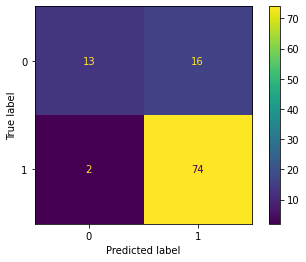

In [33]:
plot_confusion_matrix(LR, test_x, test_y)
plt.show()

In [34]:
metricas = {'Accuracy':  [LR.score(test_x,test_y),
                          LDA.score(test_x,test_y),
                          DT.score(test_x,test_y),
                          KN.score(test_x,test_y),
                          SVM.score(test_x,test_y),
                          RF.score(test_x,test_y)],
            'Precision': [precision_score(test_y, LR.predict(test_x)),
                          precision_score(test_y, LDA.predict(test_x)),
                          precision_score(test_y, DT.predict(test_x)),
                          precision_score(test_y, KN.predict(test_x)),
                          precision_score(test_y, SVM.predict(test_x)),
                          precision_score(test_y, RF.predict(test_x))],
            'Recall' :   [recall_score(test_y, RF.predict(test_x)),
                          recall_score(test_y, LDA.predict(test_x)),
                          recall_score(test_y, DT.predict(test_x)),
                          recall_score(test_y, KN.predict(test_x)),
                          recall_score(test_y, SVM.predict(test_x)),
                          recall_score(test_y, RF.predict(test_x))]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','LDA','DT','KN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.828571,0.822222,0.881579
LDA,0.828571,0.822222,0.973684
DT,0.600000,0.793103,0.605263
KN,0.590476,0.703704,0.750000
SVM,0.723810,0.723810,1.000000
RF,0.780952,0.827160,0.881579


## Curva ROC
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/250px-Roc-draft-xkcd-style.svg.png" width="350" height="80"/>

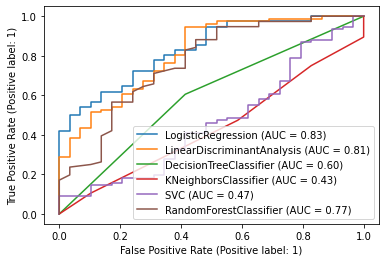

In [35]:
plot_roc_curve(LR, test_x, test_y, ax=plt.gca())
plot_roc_curve(LDA, test_x, test_y, ax=plt.gca())
plot_roc_curve(DT, test_x, test_y, ax=plt.gca())
plot_roc_curve(KN, test_x, test_y, ax=plt.gca())
plot_roc_curve(SVM, test_x, test_y, ax=plt.gca())
plot_roc_curve(RF, test_x, test_y, ax=plt.gca())

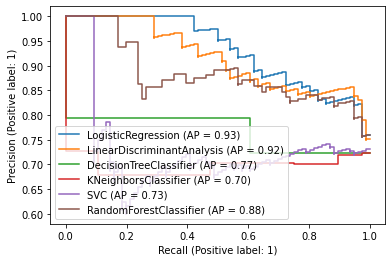

In [36]:
plot_precision_recall_curve(LR, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(LDA, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(DT, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(KN, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(SVM, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(RF, test_x, test_y, ax=plt.gca())